In [1]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# API credentials here
consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
#Defining Search keyword and number of tweets and searching tweets
query = 'eBay LoveIsland'
max_tweets = 3000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items()] #removed max_tweets from items ()


In [25]:
#Creating Dataframe of Tweets
#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])

 #Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('eBayLoveIsland_data.csv')

Total Positive =  140
Total Negative =  30


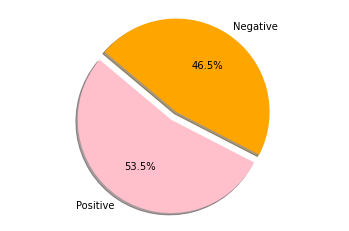

In [26]:
#Sentiment Analysis Report
#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)

#Plotting sentiments
labels = 'Positive', 'Negative',
sizes = [257, 223]
colors = ['pink', 'orange']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [27]:
tweet_dataset.head()


,tweet_id,text,favorite_count,retweet_count,created_at
0,1552585712431661058,Who would have thought #LoveIsland would be ke...,0,0,Thu Jul 28 09:24:14 +0000 2022
1,1552497289960235008,can a reporter on here do a deep dive of how t...,0,0,Thu Jul 28 03:32:52 +0000 2022
2,1552390516653842432,I can’t get over how no ones outfits slaps. Br...,11,1,Wed Jul 27 20:28:35 +0000 2022
3,1552387850850553857,👗 inspired by #LoveIsland\n\nShop now\nhttps:/...,0,0,Wed Jul 27 20:18:00 +0000 2022
4,1552368225991655426,She won the challenge and our hearts. @PaigeTh...,0,0,Wed Jul 27 19:00:01 +0000 2022


In [28]:
#Cleaning Data
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
     
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1552585712431661058,Who would have thought #LoveIsland would be ke...,0,0,Thu Jul 28 09:24:14 +0000 2022
1,1552497289960235008,can a reporter on here do a deep dive of how t...,0,0,Thu Jul 28 03:32:52 +0000 2022
2,1552390516653842432,I can’t get over how no ones outfits slaps. Br...,11,1,Wed Jul 27 20:28:35 +0000 2022
3,1552387850850553857,👗 inspired by #LoveIsland\n\nShop now\nhttps:/...,0,0,Wed Jul 27 20:18:00 +0000 2022
4,1552368225991655426,She won the challenge and our hearts. slayyyy...,0,0,Wed Jul 27 19:00:01 +0000 2022


In [29]:
tweet_dataset['text'].head()


0    Who would have thought #LoveIsland would be ke...
1    can a reporter on here do a deep dive of how t...
2    I can’t get over how no ones outfits slaps. Br...
3    👗 inspired by #LoveIsland\n\nShop now\nhttps:/...
4    She won the challenge and our hearts.  slayyyy...
Name: text, dtype: object

In [32]:
#Cleaning Tweets
corpus = []
for i in range(0, 1000):
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

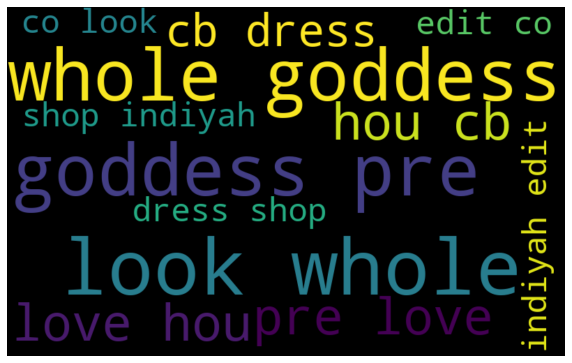

In [33]:
#Visualization
#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet_dataset['text'])
#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(10) 
print(most_occur)

TypeError: ignored

In [23]:
from google.colab import files
files.download("eBayLoveIsland_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>